In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [2]:
df = pd.read_csv('C:/Users/prade/Downloads/ice_cream.csv')

In [3]:
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [5]:
df.rename(columns = {'DATE':'date', 'IPN31152N':'production'}, inplace = True)

In [6]:
df.head()

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [7]:
#convert date coulmn to datetime type
df['date']= pd.to_datetime(df.date)

In [8]:
#set date as index
df.set_index('date', inplace = True)

In [9]:
#just to get data from 2010 onwards
start_date  = pd.to_datetime('2010-01-01')
df = df[start_date:]

In [10]:
#show result
df.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


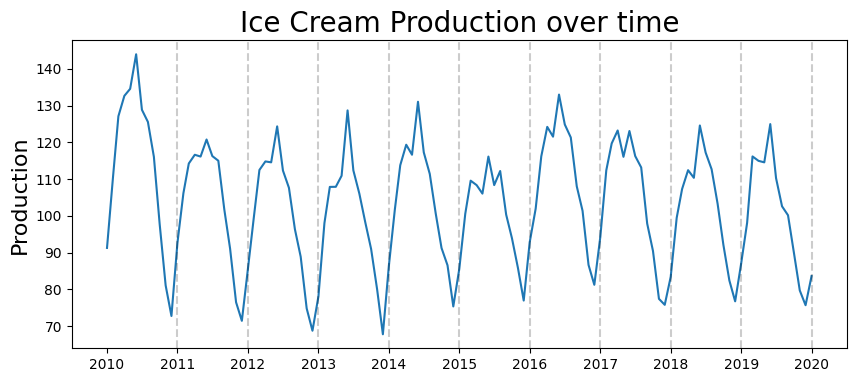

In [13]:
plt.figure(figsize = (10,4))
plt.plot(df.production)
plt.title('Ice Cream Production over time', fontsize =20)
plt.ylabel('Production', fontsize = 16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

ACF

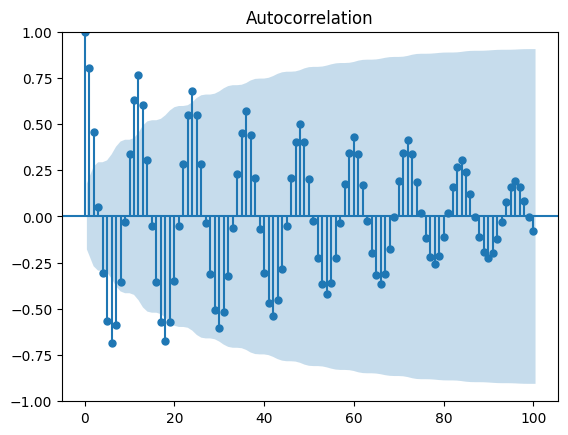

In [16]:
acf_plot = plot_acf(df.production, lags = 100)

Anything under the blue bar is statistically not significant.
Based on decaying ACF, we are likely dealing with an Auto Regressive Process

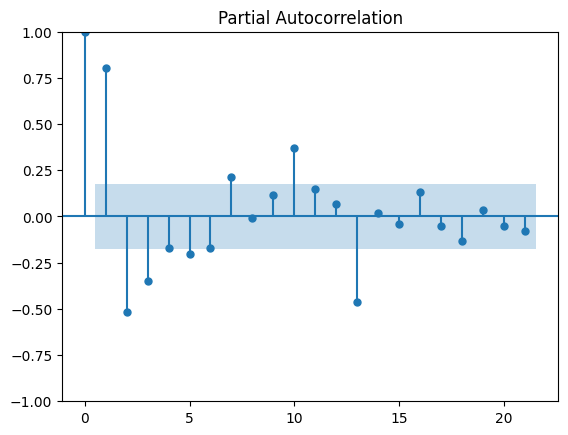

In [19]:
pacf_plot = plot_pacf(df.production)

Based on PACF, we should start with AR model with lags 1,2,3,10,13